In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [127]:
reactor_cap_list = np.arange(1000.0, 21000.0, 1000.0)
turb_ratio_list = 1.0 * np.array([1])
therm_stor_list = np.array([1500.0])
therm_dis_ratio_list = np.array([300.0])
emiss_lim_list = 100.0 * np.array([2.5, 5, 7.5, 10, 15, 20, 25])


In [128]:
result_dir = Path.cwd().joinpath('Results')
result_dir.is_dir()

True

In [129]:
annuitized_investment_fixedcost = np.zeros([len(reactor_cap_list), len(emiss_lim_list)], dtype=float)
turbine_cap = np.zeros_like(annuitized_investment_fixedcost)
reactor_gross_cap = np.zeros_like(annuitized_investment_fixedcost)

In [130]:
for i, reactor_cap in enumerate(reactor_cap_list):
    for j, emiss_lim in enumerate(emiss_lim_list):
        file_name = 'EmissLevel_{}_ReactorCap_{}_TurbRatio_{}_ThermStor_{}_ThermDisRatio_{}/fusion_var.csv'.format(emiss_lim, reactor_cap, turb_ratio_list[0], therm_stor_list[0], therm_dis_ratio_list[0])
        file_path = result_dir.joinpath(file_name)
        if not file_path.is_file():
            continue
        df = pd.read_csv(file_path)
        annuitized_investment_fixedcost[i,j] = np.abs(df['Gross_Cap_Dual'])
        turbine_cap[i,j] = df['Turbine_Cap']
        reactor_gross_cap[i,j] = df['Reactor_Gross_Cap']

In [131]:
r = 0.06
l = 40
annuit_factor = (1 - (1 + r)**(-l)) / r

annuitized_investment = annuitized_investment_fixedcost / 1.15
capex_results = annuitized_investment * annuit_factor / 1e3

turbine_ratio_output = turbine_cap / reactor_gross_cap

Text(0.5, 1.0, 'FPP max CAPEX ($/kWe)')

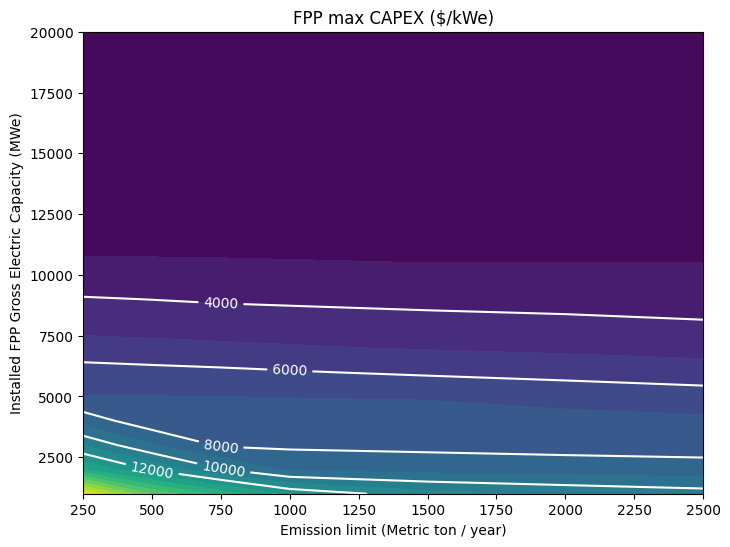

In [132]:
fig, ax = plt.subplots(figsize=(8,6))
cs = ax.contourf(emiss_lim_list, reactor_cap_list, capex_results, levels=20, cmap='viridis')
ds = ax.contour(emiss_lim_list, reactor_cap_list, capex_results, levels=np.arange(2000,14000,2000), colors='white')
ax.clabel(ds, inline=1, fontsize=10)
ax.set_xlabel('Emission limit (Metric ton / year)')
ax.set_ylabel('Installed FPP Gross Electric Capacity (MWe)')
ax.set_title('FPP max CAPEX ($/kWe)')
# fig.colorbar(cs, ax=ax)

Text(0.5, 1.0, 'FPP max CAPEX ($/kWe)')

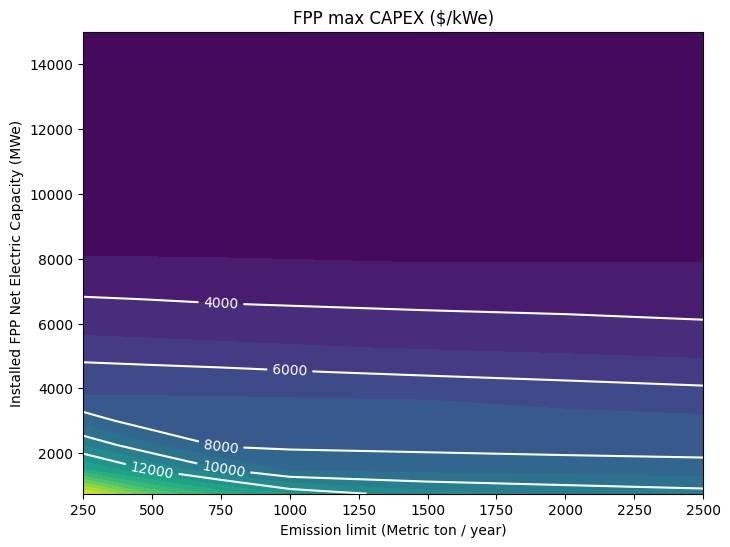

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
cs = ax.contourf(emiss_lim_list, 0.75 * reactor_cap_list, capex_results, levels=20, cmap='viridis')
ds = ax.contour(emiss_lim_list, 0.75 * reactor_cap_list, capex_results, levels=np.arange(2000,14000,2000), colors='white')
ax.clabel(ds, inline=1, fontsize=10)
ax.set_xlabel('Emission limit (Metric ton / year)')
ax.set_ylabel('Installed FPP Net Electric Capacity (MWe)')
ax.set_title('FPP max CAPEX ($/kWe)')
# fig.colorbar(cs, ax=ax)

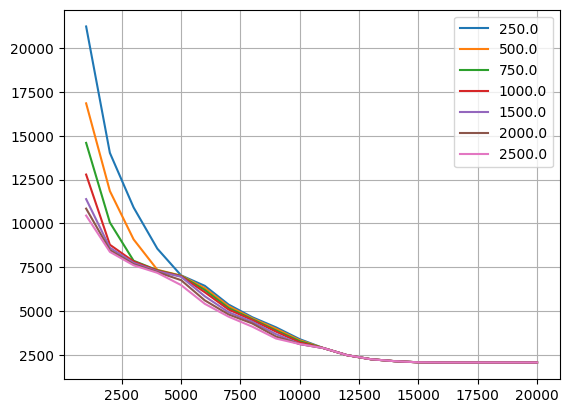

In [134]:
for i in range(len(emiss_lim_list)):
    plt.plot(reactor_cap_list, capex_results[:,i], label = emiss_lim_list[i])
plt.grid(True)
plt.legend()

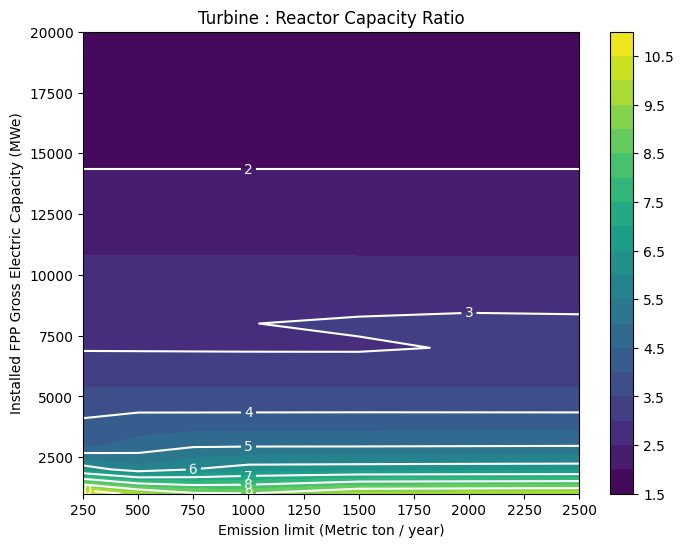

In [135]:
fig, ax = plt.subplots(figsize=(8,6))
cs = ax.contourf(emiss_lim_list, reactor_cap_list, turbine_ratio_output, levels=20, cmap='viridis')
ds = ax.contour(emiss_lim_list, reactor_cap_list, turbine_ratio_output, levels=np.arange(1,15,1), colors='white')
ax.clabel(ds, inline=1, fontsize=10)
ax.set_xlabel('Emission limit (Metric ton / year)')
ax.set_ylabel('Installed FPP Gross Electric Capacity (MWe)')
ax.set_title('Turbine : Reactor Capacity Ratio')
fig.colorbar(cs, ax=ax)